In [6]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [17]:
%load_ext autoreload
%autoreload 2

In [62]:
from __future__ import division

import glob
import numpy as np
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [64]:
import scipy.misc
from IPython import display

In [49]:
from compactness.helpers import getSphere
from compactness.helpers import rotate3D

from compactness.moments import immoment3D

from compactness.compactness import int_max_abs

In [2]:
files = glob.glob('01_xz/*.tif')

In [3]:
volume = np.zeros((140, 140, 140))
for i,filename in enumerate(files):
    img = Image.open(filename)
    # print filename
    pixels = np.asarray(img)
    volume[i,:,:] = pixels

In [65]:
def loadVolume(dirPath):
    files = glob.glob(dirPath + '/*.tif')
    volume = np.zeros((140, 140, 140))
    for i,filename in enumerate(files):
        img = Image.open(filename)
        # print filename
        pixels = np.asarray(img)
        volume[i,:,:] = pixels
    volume = volume > 128
    return volume.astype(np.int)

volume = loadVolume('01_xz')

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# X, Y, Z = (1-volume).nonzero()
X, Y, Z = volume.nonzero()

ax.plot(X, Y, Z, '.')

In [7]:
# Move to helpers ?
def plotVolume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y, Z = volume.nonzero()
    ax.plot(X, Y, Z, '.')
plotVolume(volume)

In [48]:
plotVolume(np.ones((140,140,140)))

In [20]:
volume = getSphere(50)
plotVolume(volume)

In [27]:
int_max_abs(X,Y,Z)

5.5555555555555554

In [23]:
# Test rotate3D
nSamples = 10
X = np.zeros(nSamples)
Y = np.linspace(-1,1,nSamples)
Z = np.zeros(nSamples)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for rx in np.linspace(0,pi, 5):
    for ry in np.linspace(0,pi, 5):
        X_,Y_,Z_ = rotate3D(X,Y,Z, rx, ry)
        ax.plot(X_, Y_, Z_,'+')


In [51]:
plotVolume(volume)

In [38]:
nSteps = 100
angles = np.linspace(0,np.pi,nSteps)

X, Y, Z = volume.nonzero()
X, Y, Z = X-70,Y-70,Z-70

fxy = np.zeros((nSteps,nSteps))
for i,rx in enumerate(angles):
    for j,ry in enumerate(angles):
        X_,Y_,Z_ = rotate3D(X,Y,Z, rx,ry)
        fxy[i,j] = int_max_abs(X_,Y_,Z_)
        

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a,b = np.meshgrid(angles, angles)
#ax.plot(a.flatten(), b.flatten(), fxy.flatten())
ax.plot_surface(a.flatten(), b.flatten(), fxy.flatten())

In [28]:
# X,Y,Z = volume.nonzero()
# XYZ = np.vstack([ X-70,Y-70,Z-70 ])
# int_max_abs(X-70,Y-70,Z-70)

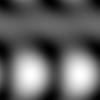

In [66]:
scipy.misc.imsave('outfile.jpg', fxy)
display.Image(filename='outfile.jpg')

In [46]:
X.mean(),Y.mean(),Z.mean()

(-45.0, -45.0, -45.0)

In [43]:
vol = volume.sum()
# 3/8 * vol**(4/3) / int_max_abs(X-70,Y-70,Z-70)
print 3/8
print vol**(4/3)
print int_max_abs(X-70,Y-70,Z-70)
print 3/8 * vol**(4/3) / int_max_abs(X-70,Y-70,Z-70)
print fxy.min()
print 3/8 * vol**(4/3) / fxy.min()


0.375
2619745.95621
8134706
0.120767085323
3576516.0
0.274682046321


In [75]:
# Test immmoments
volume = getSphere(50)
X,Y,Z = volume.nonzero()

X,Y,Z = volume.nonzero()


# Moment 0,0,0 is the volume of the object
assert volume.sum()==immoment3D(X,Y,Z,0,0,0)
assert len(X)==immoment3D(X,Y,Z,0,0,0)

m000 = immoment3D(X,Y,Z,0,0,0)
m100 = immoment3D(X,Y,Z,1,0,0)
m010 = immoment3D(X,Y,Z,0,1,0)
m001 = immoment3D(X,Y,Z,0,0,1)
print m000
print m100
print m010
print m001

print m100 / m000
print m010 / m000
print m001 / m000

# Centering 
X = X-(m100 / m000)
Y = Y-(m010 / m000)
Z = Z-(m001 / m000)

m000 = immoment3D(X,Y,Z,0,0,0)
m100 = immoment3D(X,Y,Z,1,0,0)
m010 = immoment3D(X,Y,Z,0,1,0)
m001 = immoment3D(X,Y,Z,0,0,1)
print '=============='
print m000
print m100
print m010
print m001


710403
47806861
49495500
56286828
67.2954097885
69.6724253698
79.2322498638
710403.0
-2.77516392089e-08
3.87539955682e-09
-1.4656222902e-09
